# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N  (x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N  (x_iy_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}N}{\sum_{i=1}^N x_i^2 - N \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

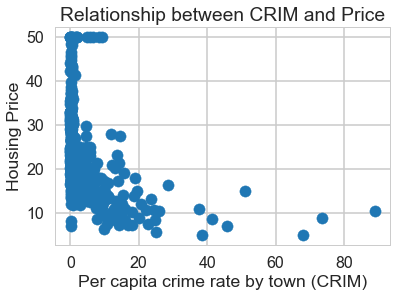

In [12]:
_ = plt.scatter(bos.CRIM, bos.PRICE)
_ = plt.xlabel("Per capita crime rate by town (CRIM)")
_ = plt.ylabel("Housing Price")
_ = plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [13]:
# your turn: describe relationship

__What kind of relationship do you see? e.g. positive, negative? linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?__
***
* The `Housing Price` seems to be negatively correlated to the `Per capita crime rate by town (CRIM)`. The relationship looks linear but since the CRIM ratio's `median` as seen above using `describe()` is 0.25 so 50% values lie below 0.25 and in fact 75% values lie below 3.65 while the maximum crime rate is 88.97. So, since the range of the data is so wide we could either standardize it by subtracting the mean and dividing by std OR we can plot the CRIM values on a logscale as done below.
***

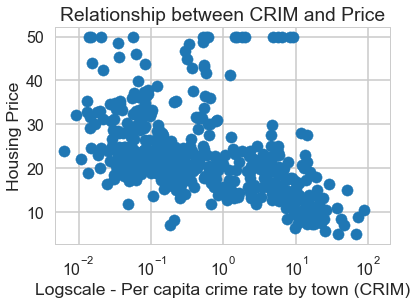

In [14]:
# Plotting the above graph using logscale
_ = plt.scatter(bos.CRIM, bos.PRICE)
_ = plt.xlabel("Logscale - Per capita crime rate by town (CRIM)")
_ = plt.ylabel("Housing Price")
_ = plt.title("Relationship between CRIM and Price")
_ = plt.xscale('log')
_ = plt.xlim([bos.CRIM.min() - bos.CRIM.min()*0.25, bos.CRIM.max() + bos.CRIM.max()*1.25])

***
* The linear trend is much more clear when the crime rate is plotted on a `logscale`. 
***

__# your turn: scatter plot between *RM* and *PRICE*__

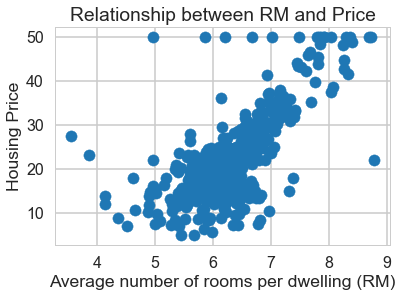

In [15]:
# your turn: scatter plot between *RM* and *PRICE*

_ = plt.scatter(bos.RM, bos.PRICE)
_ = plt.xlabel("Average number of rooms per dwelling (RM)")
_ = plt.ylabel("Housing Price")
_ = plt.title("Relationship between RM and Price")


***
* A pretty strong positive linear relationship between `Average number of rooms per dwelling (RM)` and `Housing Price` is observed here as one would expect because a house with more rooms will have a higher price than a similar house with lesser rooms. 
***

__your turn: scatter plot between *PTRATIO* and *PRICE*__

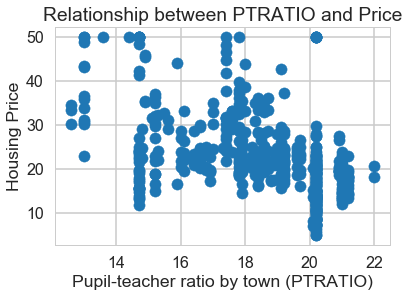

In [16]:
# your turn: scatter plot between *PTRATIO* and *PRICE*

_ = plt.scatter(bos.PTRATIO, bos.PRICE)
_ = plt.xlabel("Pupil-teacher ratio by town (PTRATIO)")
_ = plt.ylabel("Housing Price")
_ = plt.title("Relationship between PTRATIO and Price")

***
* The relationship between `Pupil-teacher ratio by town (PTRATIO)` and `Housing Price` looks ngeative linear but the Housing Price variation looks high and the relationship cannot be said to be as strong as that of Housing Price with CRIM and RM. But one would expect the Housing Price to go down as the PTRATIO increases because students and parents would prefer to have a low PTRATIO and hence would not be willing to pay more if that ratio is high.
***

__your turn: create some other scatter plots__

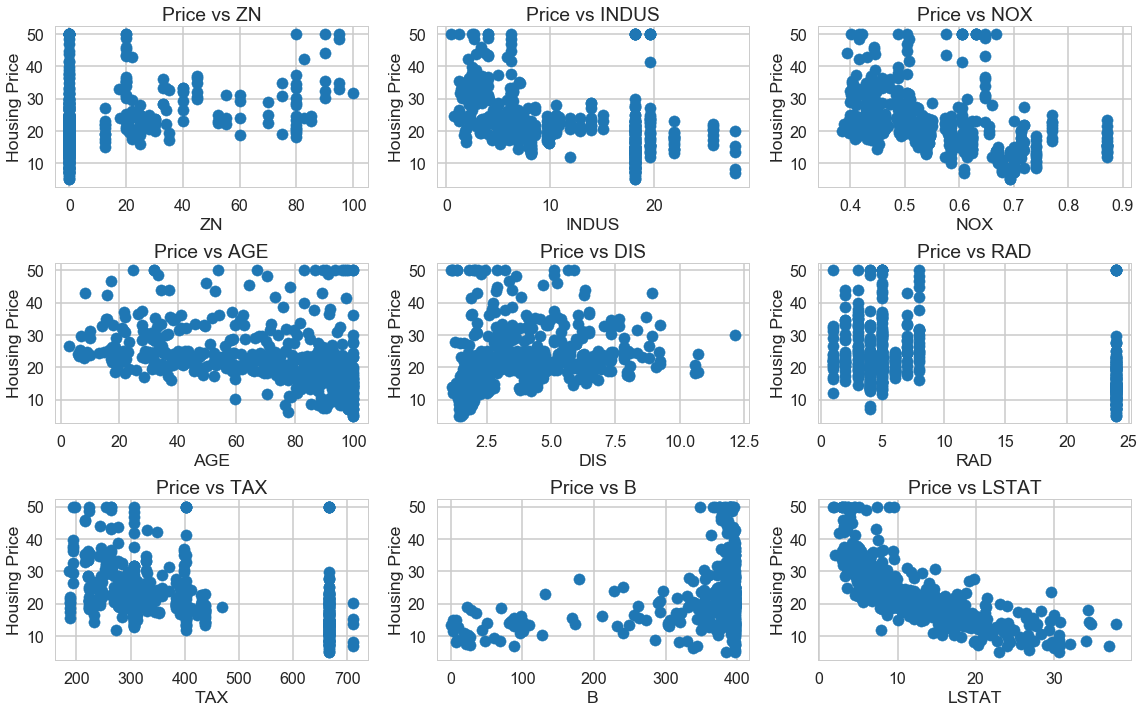

In [17]:
# your turn: create some other scatter plots
#sns.pairplot(bos, x_vars = ['ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'], \
#             y_vars = ['PRICE'])

# Plotting all the scatter plots for column names in cols below using subplots. 
cols = ['ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
fig, ax = plt.subplots(3, 3)
for i in range(0, len(cols)):
    #print(ax[i][i%3])
    #plt.subplot(3,3,i+1)
    ax[i//3][i%3].figure.set_size_inches(16, 10)
    ax[i//3][i%3].scatter(bos[cols[i]], bos.PRICE)
    ax[i//3][i%3].set_xlabel(cols[i])
    ax[i//3][i%3].set_ylabel("Housing Price")
    ax[i//3][i%3].set_title('Price vs '+cols[i])
    fig.tight_layout()
    #plt.title("Relationship between PTRATIO and Price")

***
Observations from above scatter plots (listing only those parameters whose relationship with the housing price seems significant from the above figures):
* `INDUS`: The `housing price` decreases with increasing `proportion of non-retail business acres per town (INDUS)`. Usually people prefer housing in a residential area which has high number of retail stores, so this observation makes sense, though the relationship is not that strong. 
* `NOX`: The `housing price` decreases with increasing `nitric oxides concentration (parts per 10 million) (NOX)`. People usually like to stay with their family in clean air spaces so this is kind of expected. 
* `AGE`: The `housing price` decreases with increasing `proportion of owner-occupied units built prior to 1940 (AGE)` which is kind of expected as people prefer to stay in newly built houses. 
* `DIS`: The `housing price` seems to increase with increasing `weighted distances to five Boston employment centres (DIS)` which is kind of counterintutive because one would assume that the closer the house is to the employment centers the more preferable it would be for a buyer. 
* `TAX`: The `housing price` seems to decrease slightly with increasing `full-value property-tax rate per $10,000 (AGE)` because naturally people would be hesitant to more taxes on an already expensive house.
* `B`: Check below the graph for `B` as a function of `the proportion of blacks by town (Bk)`. We can see from the graph that higher values of B indicate lower proportions of blacks by town. And from the above scatter plot it seems the price of the house increases with increasing values of B, i.e. with decreasing values of Bk. 
* `LSTAT`: The `housing price` seems to follow a strong negative linear relationship with the `% lower status of the population (LSTAT)`. As the % lower status of the population increases the price of the hosues decrease (maybe) to match the market expectations. 
***


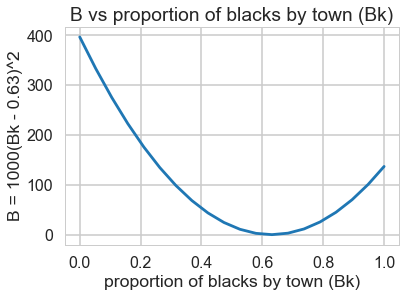

In [18]:
# graph for B as a function of the proportion of blacks by town (Bk) to understand the function used 
blk = []
for bk in np.linspace(0,1,20):
    #print('for proportion of ' + str(round(bk,2)) +' ', 1000*(bk - 0.63)**2)
    blk.append(1000*(bk - 0.63)**2)
_ = plt.plot(np.linspace(0,1,20), blk)
_ = plt.title('B vs proportion of blacks by town (Bk)')
_ = plt.xlabel('proportion of blacks by town (Bk)')
_ = plt.ylabel('B = 1000(Bk - 0.63)^2')

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

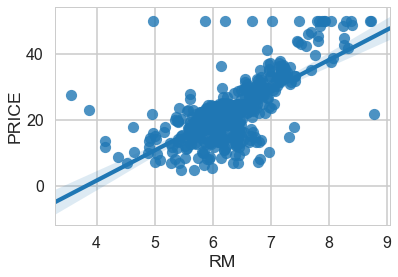

In [19]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


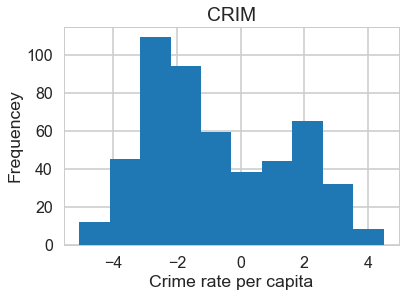

In [20]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

__Exercise: In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?__

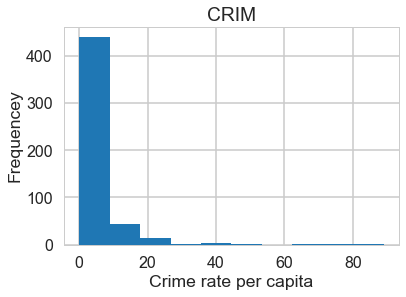

In [21]:
#your turn
# Histogram of CRIM without taking the log
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

***
* As explained earlier, since the range of CRIM data is so wide and 75% of the data lies below 3.6 it is better to plot the histogram too in logscale to better visualize the spread.
***

__Exercise: Plot the histogram for RM and PTRATIO against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.__

***
* We can use sns.pairplot to plot multiple variables against each other and also to visualize their individual histograms.
* We'll plot the histogram of RM, PTRATIO, LSTAT, NOX
***

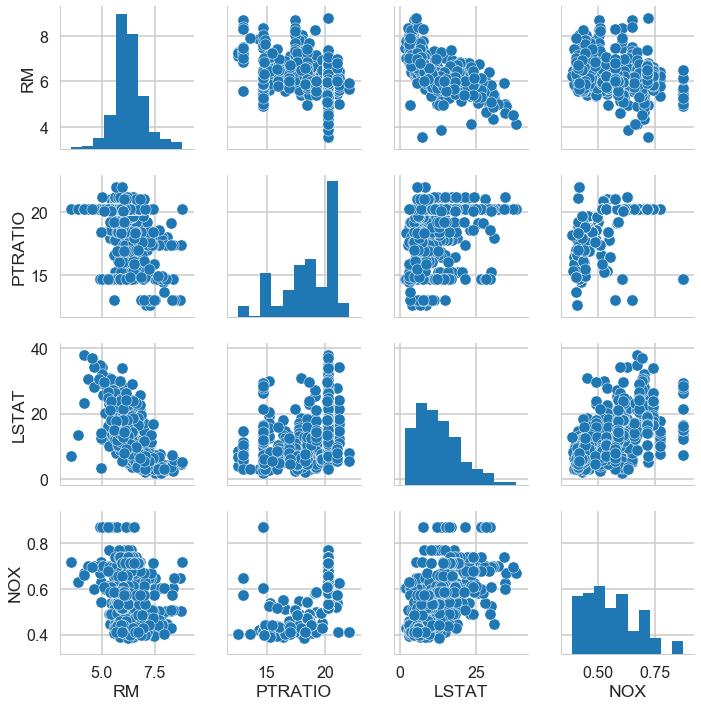

In [22]:
_ = sns.pairplot(bos, vars = ['RM', 'PTRATIO', 'LSTAT', 'NOX'])

***
* From the above plots, it seems that the RM and LSTAT are negatively correlated. One would expect the houses to be smaller or number of rooms to be lower in an area with higher proportion of lower status population.
***

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [23]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           2.49e-74
Time:                        00:39:24   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is done like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

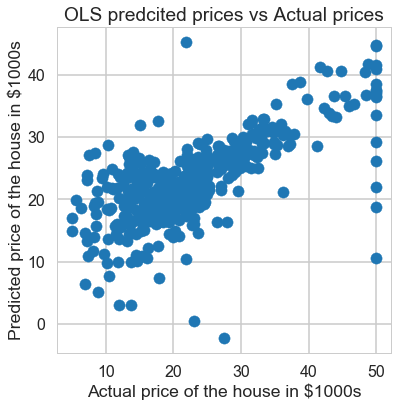

In [25]:
# your turn
_ = plt.figure(figsize=(6,6))
_ = plt.scatter(bos.PRICE, m.fittedvalues) 
_ = plt.xlabel("Actual price of the house in $1000s")
_ = plt.ylabel("Predicted price of the house in $1000s")
_ = plt.title("OLS predcited prices vs Actual prices")


* The OLS predicted prices vs Actual prices plot above shows that the predictions for lower prices have high variability and also the high prices (>45) are always almost predicted incorrectly. 
* Also, one of the predicted prices is negative which is not possible in reality because housing prices are always positive.
***

### Fitting Linear Regression using `sklearn`


In [26]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [27]:
# Look inside lm object
#lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [28]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [29]:
# your turn

__Exercise: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look here.__

***
* If using the `statsmodel OLS` method we can simply add $-1$ to the formula to avoid the intercept term. 
* In sklearn linear regression model, we can pass the argument `fit_intercept = False` while creating the LinearRegression object. i.e.  `lm = LinearRegression(fit_intercept = False)`.
* But for our housing data, even if all the independent paramters were to have a value of 0, we wouldn't expect the housing price to go to 0 because any house will have a built-in minimum price which may consist of the construction costs, etc. irrespective of the other X parameters. So, we shouldn't get rid of the intercept here (but it should always be positive).
***

__Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.__

***
* To satisfy the i.i.d conditon with the residuals the residual values should be normally distributed with a mean of 0. Also, the variance of the residuals should remain constant over the entire range of the predictor variables. There should be no apparent pattern in the residuals suggesting any kind of correlation. This ensures that all of the variation in the data has already been explained by our model. 
***

__Exercise: True or false. To use linear regression,  $Y$ must be normally distributed. Explain your answer.__

***
* To use Linear Regression only the residuals need to be normally distributed, not $Y$. The values of $Y$ depend on the $X$ variables so it can take any form depending on its relation with $X$ and $X$'s distribution.
***

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [30]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.49110328036135


In [31]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [32]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [33]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [34]:
# your turn

__Exercise: Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?__

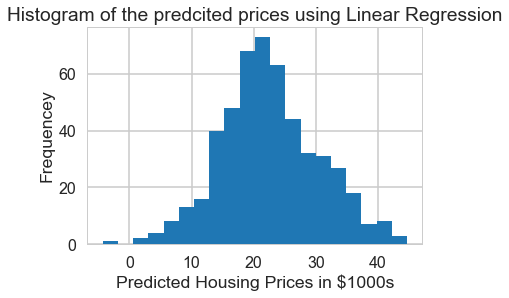

center of the data is 22.121


In [35]:
# Histogram of predicted prices 
_ = plt.hist(lm.predict(X), bins = 20)
_ = plt.title("Histogram of the predcited prices using Linear Regression")
_ = plt.xlabel("Predicted Housing Prices in $1000s")
_ = plt.ylabel("Frequencey")
_ = plt.show()
print('center of the data is {}'.format(round(np.median(lm.predict(X)),3)))

***
* The predicted housing prices seem to be centred around 22,121 which is roughly the same as our actual housing prices (21,200).
* The spread looks somewhat normal but there is more area under the curve for higher housing prices indicating more probability of getting a housing price greater than ~10,000. 
* Also, the predicted prices seem to max out at about 45,000 but the actual max value of the housing price from the original dataset is 50,000. So, the higher prices aren't being predicted that well.
* Lastly, there is an outlier which is negative indicating the model is outputting negative values for some X variables which shouldn't happen because housing prices cannot be negative. We need to fix this while defining our model. 
***

__Exercise: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with statsmodels before).__

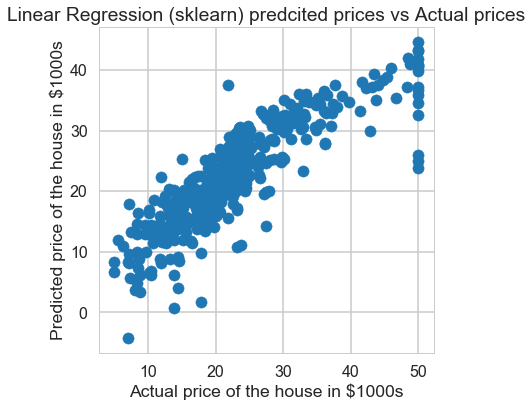

In [36]:
# Plotting lm.predict(X) vs boc.PRICE
_ = plt.figure(figsize=(6,6))
_ = plt.scatter(bos.PRICE, lm.predict(X)) 
_ = plt.xlabel("Actual price of the house in $1000s")
_ = plt.ylabel("Predicted price of the house in $1000s")
_ = plt.title("Linear Regression (sklearn) predcited prices vs Actual prices")

__Exercise: We have looked at fitting a linear model in both statsmodels and scikit-learn. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does statsmodels provide?__

***
* For starters it is easier to pass on multiple columns as variables in scikit-learn's model as compared to for statsmodels. 
* Sklearn has more useful features where you can use achieve cross validation to achieve to test the model on unknown data which is very important for real world projects. 
* But statsmodels output gives is more statistically reach than sklearn's output and is good for understanding various parameters like, the p values, normality of the predictions, etc.
* Since SKLearn has more useful features, I would prefer to build my final model with it, but statsmodels is a good method to analyze your data before you put it into your model.
***

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [37]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149873


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [38]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31636.019130869747


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [39]:
# your turn

__Exercise: Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.__

In [40]:
# defining the X variable as 'PTRATIO' (pupil-teacher ratio by town)
X = np.array(bos['PTRATIO']).reshape(-1, 1) #converting the data into a (1,1) 2-D array 
y = np.array(bos['PRICE']).reshape(-1, 1)   #converting the data into a (1,1) 2-D array
# This creates a LinearRegression object
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# Printing the coefficiencts and intercept
print('The intercept and coefficient for the housing Price vs PTRATIO relationship are {} and {} respectively.'.\
      format(reg.intercept_, reg.coef_))

The intercept and coefficient for the housing Price vs PTRATIO relationship are [62.34462747] and [[-2.1571753]] respectively.


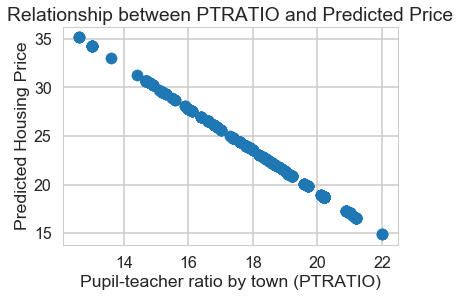

In [42]:
# Plotting the scatter plot between *PTRATIO* and *predicted PRICE*

_ = plt.scatter(bos.PTRATIO, reg.predict(X))
_ = plt.xlabel("Pupil-teacher ratio by town (PTRATIO)")
_ = plt.ylabel("Predicted Housing Price")
_ = plt.title("Relationship between PTRATIO and Predicted Price")

***
* A slope of -2.157 indicates that a 1 unit increase in the PTRATIO results in a housing price decrease of -2.157(*$1000). 
* The intercept of 62.344 indicates that when the PTRATIO is 0 the housing price will be \$62,344. 
***

__Exercise: Calculate (or extract) the  $R^2$  value. What does it tell you?__

In [43]:
#Extracting the R^2 value from the fitted model
print('The R2 value for our linear model is {}'.format(reg.score(X, y)))
# We could also calcualted the R2 using the formulas below:
RSS = np.sum((y - reg.predict(X))**2)
ESS = np.sum((reg.predict(X) - np.mean(y))**2)
R2 = ESS/(RSS + ESS)

The R2 value for our linear model is 0.257847318009223


***
* The $R^2$ value of 0.258 indicates that only 25.8% of the variation in our original dataset is explained by our linear model consisting of the PTRATIO variable alone. To increase the $R^2$ we need to add in more independent variables.
***

__Exercise: Compute the  FF -statistic. What does it tell you?__

In [44]:
# Mean square error; N = len(y), K = 1 (since only PTRATIO is used here)
N = len(y)
K = 1
MSE = RSS/(N-K-1)
MSR = ESS/K
FS = MSR/MSE
print('The mean squared error on our predicted prices is {}\n'.format(MSE))
print('The calculated FF stat for our model is {}'.format(FS))

The mean squared error on our predicted prices is 62.90081985509376

The calculated FF stat for our model is 175.10554287569525


__To review more statisitcal properties of the linear model let's use statsmodel's ols on the same data. We should expect to see same results but with more statistical values__

In [45]:
m_ptratio = ols('PRICE ~ PTRATIO', bos).fit()
print(m_ptratio.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           1.61e-34
Time:                        00:39:27   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

***
* We see that we get the exact same results using statsmodel's ols as we had got by using sklearn's LinearRegression model but with much more statistical information about the model.
* The F-stat as calculated earlier is 175.1. And the p-value, which indicates the significance of the slope obtained, is very low ~ 1.61e-34. This means that we can reject the null hypothesis (which is defined as that the PTRATIO has no significant effect on PRICE). So, we can say that our model defined by using PTRATIO as the independent variable is statistically significant. 
***

__Exercise: Take a close look at the  F -statistic and the  t -statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in simple linear regression models.__

***
* The F-stat is the square of t-stat (i.e. $175.1 = (-13.233)^2$). This holds true for a simple linear regression model.
* The p-value for the t-test is the probability of recording a t-value as far from zero, and this equals the probability of getting as large an F-ratio as the one evaluated from the data. We can observe here that the p-values for both the F-stat and t-stat are zero here. The t-test and F-test therefore result in identical p-values.
***

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [46]:
# your turn

__Fitting a linear regression model using three independent variables:__

- __'CRIM' (per capita crime rate by town)__
- __'RM' (average number of rooms per dwelling)__
- __'PTRATIO' (pupil-teacher ratio by town)__

In [47]:
m_CR_RM_PT = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m_CR_RM_PT.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           1.09e-97
Time:                        00:39:27   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

***
- __Exercise: Compute or extract the  F -statistic. What does it tell you about the model?__

- __Exercise: Compute or extract the $R^2$  statistic. What does it tell you about the model?__

- __Exercise: Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.__
***

* The F-stat = 244.2 and the p-value for obtaining a F-stat as high as 244.2 is 1.09e-97 which is ~ 0. This indicates that the slopes obtained for all the variables are indeed significant. 
* $R^2 = 0.593$. The $R^2$ did increase from 0.258 for a single variable (PTRATIO) model to 0.593 by including two more independent variables CRIM and RM. This means our linear regression model using CRIM, RM and PTRATIO explains 59.3% of the variance in our original dataset and adding CRIM and RM did improve our model's performance.
* The p-values for the t-stats of all the coefficients for the three variables here are 0, so we can say that all three variables- CRIM, RM and PTRATIO- have significant slopes. By observing the slopes we can see that PRICE is most sensitive to RM because in every 1 unit increase of RM the PRICE increases by 7.3816 units; i.e. if suppose the number of rooms for a dwelling increases by 1 (keeping other variables constant), the housing price is expected to go up by \$7,381.6 which is pretty significant. The PTRATIO has next most significant coefficient after RM and as per the coefficient value, per unit increase in PRATIO causes the PRICE to decrease by 1.0742 units. The least significant coefficient is that of CRIM and per unit increase in CRIM causes the PRICE to decrease by 0.2021 units.
***

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

__Let's add NOX, CHAS, DIS and LSTAT to our previous model of CRIM, PTRATIO and RM. These parameters seem to have some linear relation with PRICE as was evident from the scatter plots.__
__Also, using np.log on CRIM and LSTAT variables.__

In [48]:
m_multiple = ols('PRICE ~ np.log(CRIM) + RM + PTRATIO + NOX + CHAS + DIS + np.log(LSTAT)', bos).fit()
print(m_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     238.3
Date:                Sat, 20 Jul 2019   Prob (F-statistic):          1.64e-154
Time:                        00:39:27   Log-Likelihood:                -1468.3
No. Observations:                 506   AIC:                             2953.
Df Residuals:                     498   BIC:                             2986.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        56.8946      4.863     11.699

***
* Our model with `np.log(CRIM) + RM + PTRATIO + NOX + CHAS + DIS + np.log(LSTAT)` variables seems to outperform our model with only `CRIM + RM + PTRATIO` variables. More variables naturally help explain more variance in the original data and hence an increase in R can be obsvered here.

***

In [49]:
# Using anova_lm module from statsmodels.stats.anova which compares a model and its subset.
# We will use it to compare our m_CR_RM_PT model (using only CRIM, PTRATIO and RM) to our m_multiple model using additional 
# variables - NOX + CHAS + DIS + np.log(LSTAT).

from statsmodels.stats.anova import anova_lm
anovaResults = anova_lm(m_CR_RM_PT, m_multiple)
print(anovaResults)

   df_resid           ssr  df_diff      ss_diff          F        Pr(>F)
0     502.0  17367.841062      0.0          NaN        NaN           NaN
1     498.0   9820.323924      4.0  7547.517137  95.685834  2.403627e-60


C:\Users\ppawar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ppawar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ppawar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


***
* We can interpret the above anova table as - the squared sum of residual errors decreases by 7547 by using variables `np.log(CRIM) + RM + PTRATIO + NOX + CHAS + DIS + np.log(LSTAT)` in place of just using the `CRIM + RM + PTRATIO` variables.
* The F statistic comparing to previous model in args is 95.686 and the P-value for significance comparing to previous model is 2.403627e-60 which is ~ 0. So, we can say that our model results were significantly improved by adding in more variables. 
* Also, the AIC of our new model (2953) is much lower than the AIC of our previous model (3233) again indicating that our new model is better than the previous one.
***


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [50]:
# Your turn. (using model m_CR_RM_PT using CRIM, RM and PTRATIO variables only)

__Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?__

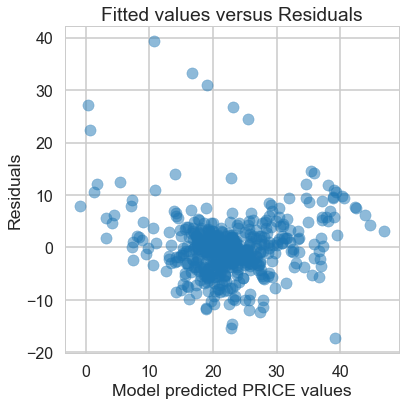

In [51]:
_ = plt.figure(figsize=(6,6))
_ = plt.scatter(m_CR_RM_PT.fittedvalues , m_CR_RM_PT.resid, alpha = 0.5) 
_ = plt.xlabel("Model predicted PRICE values")
_ = plt.ylabel("Residuals")
_ = plt.title("Fitted values versus Residuals")

***
* The residuals seem to be centered around $0$ but there are outliers and the errors seem to span out on the left and right ends. This indicates that the errors in predicitng the housing prices at lower and higher ends are higher than that of predicitng mid-range house prices. It's not a strong pattern but still we cannot say confidently that the errors are randomly and normally distributed. The variance is not constant throughout as required per the linear model assumptions.
* So, the model assumptions that the errors are i.i.d and normally distributed around mean are not fully satisfied here.
***

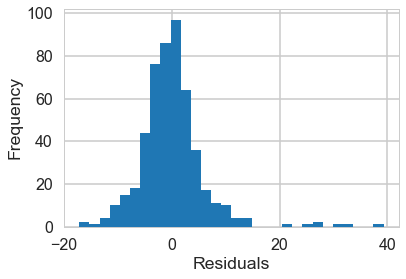

In [52]:
# PLotting a histogram of the residuals
_ = plt.hist(m_CR_RM_PT.resid, bins = 30)
_ = plt.xlabel('Residuals')
_ = plt.ylabel('Frequency')

***
* As seen before the residuals don't seem to be distributed exactly normally as they should have been and the distribution is right skewed. 
***

__Exercise: Construct a quantile plot of the residuals. What does the plot tell you?__

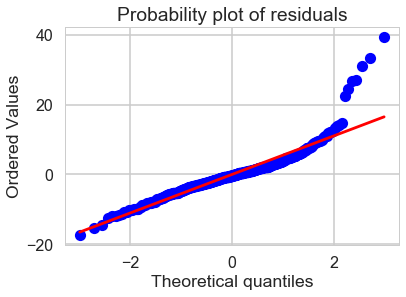

In [53]:
_ = stats.probplot(x = m_CR_RM_PT.resid, dist = 'norm', plot = plt)
_ = plt.title('Probability plot of residuals')

# We could have also done this by using:

# fig = sm.qqplot(m_CR_RM_PT.resid, line = 's') 
##‘s’ - standardized line, the expected order statistics are scaled by the standard deviation of the given \
## sample and have the mean added to them.

***
* The above quantile plot shows that the residuals are distributed along the straight line proving the assumption of normal distribution of the errors except a few outliers at the higher end as also observed in the above 2 graphs.
* So, if we can remove the outliers and then fit our model to the data, the model should meet the normal distribution of errors assumption completely.
***

__Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?__

***
* The plot of __residuals versus predicted values__ is useful for checking the assumption of linearity and homoscedasticity. The plot is used to detect non-linearity, unequal error variances, and outliers. If the model does not meet the linear model assumption, we would expect to see residuals that are very large (big positive value or big negative value). To assess the assumption of linearity we want to ensure that the residuals are not too far away from 0. To assess if the homoscedasticity assumption is met we look to make sure that there is no pattern in the residuals and that they are equally spread around the y = 0 line.
(Ref: http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression7.html)

* Here are the characteristics of a well-behaved residual vs. fits plot and what they suggest about the appropriateness of the simple linear regression model:

   - The residuals "bounce randomly" around the 0 line. This suggests that the assumption that the relationship is linear is reasonable.
   - The residuals roughly form a "horizontal band" around the 0 line. This suggests that the variances of the error terms are equal. No one residual "stands out" from the basic random pattern of residuals. This suggests that there are no outliers.

***
* On the other hand the __Normal QQ plot__ helps us to assess whether the residuals are roughly normally distributed. In particular, if the residual tend to be larger in magnitude than what we would expect from the normal distribution, then our p-values and confidence intervals may be too optimisitic. i.e., we may fail to adequately account for the full variability of the data. 
* If the data have the same degree of spacing as would be expected in normal data, then the spacing between the data values should agree with that between the normal quantile values. Plotting one against the other results in a linear pattern if the data are truly normal.
* Departures from a linear pattern exhibited in a normal quantile plot indicate a lack of normality in the data. Typically, such problems manifest themselves in an S-shaped pattern (indicating skewness) or with unusual values in the tails of the plot (indicating outliers).

***

__Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.__

***
* From the quantile and Fitted values vs Residual plots it seems that the residual values >20 are outliers. We can inspect these points closely by extracting their indices from the residual array and then using them to filter our main data. 
***

In [54]:
bos_reduced = bos[['CRIM', 'RM', 'PTRATIO', 'PRICE']]
bos_reduced['predicted_prices'] = m_CR_RM_PT.fittedvalues

C:\Users\ppawar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
bos_reduced[m_CR_RM_PT.resid > 20]

,CRIM,RM,PTRATIO,PRICE,predicted_prices
365,4.55587,3.561,20.2,27.5,0.359783
367,13.52220,3.863,20.2,23.1,0.776834
368,4.89822,4.970,20.2,50.0,10.691218
369,5.66998,6.683,20.2,50.0,23.179862
370,6.53876,7.016,20.2,50.0,25.462335
371,9.23230,6.216,20.2,50.0,19.012691
372,8.26725,5.875,20.2,50.0,16.690622


***
* We can see that except two data points all the original house prices for which our model's residual values were > 20 or seemed to be outliers are the maximum house prices ~ 50. 
* To understand this more deeply we can check how our model predicts the maximum house prices (50) in general. So we filter the data to get $PRICE == 50$.
*** 

In [56]:
bos_reduced[bos_reduced['PRICE'] == 50].sort_values('CRIM')

,CRIM,RM,PTRATIO,PRICE,predicted_prices
195,0.01381,7.875,14.4,50.0,39.352140
283,0.01501,7.923,13.6,50.0,40.565562
204,0.02009,8.034,14.7,50.0,40.202283
186,0.05602,7.831,17.8,50.0,35.366585
225,0.52693,8.725,17.4,50.0,42.300204
267,0.57834,8.297,13.0,50.0,43.856925
257,0.61154,8.704,13.0,50.0,46.854513
161,1.46336,7.489,14.7,50.0,35.887631
163,1.51902,8.375,14.7,50.0,42.416449
162,1.83377,7.802,14.7,50.0,38.123198


In [57]:
# storing the outlier indices for removing later
outlier_index = bos_reduced[m_CR_RM_PT.resid > 20].index

***
* We see above that the RM and PTRATIO remain fairly similar above for all the rows but the CRIM values increase considerably. And since our model has a -0.2 coeeficient with the CRIM value it predicts lower house prices for higher CRIM values. So we can see that till a CRIM value of ~2 our model seems to predict house prices in higher range as it should do but as CRIM increases further, due to the negative slope our model predicts lower house prices. Also, the PTRATIO was higher for the last 5 points which we basically have identified as outliers.
* In our original dataset, maybe there are some other variables driving the PRICE up inspite of the higher CRIM and PTRATIO values. Since we haven't included those variables here, high residuals should be expected.
***

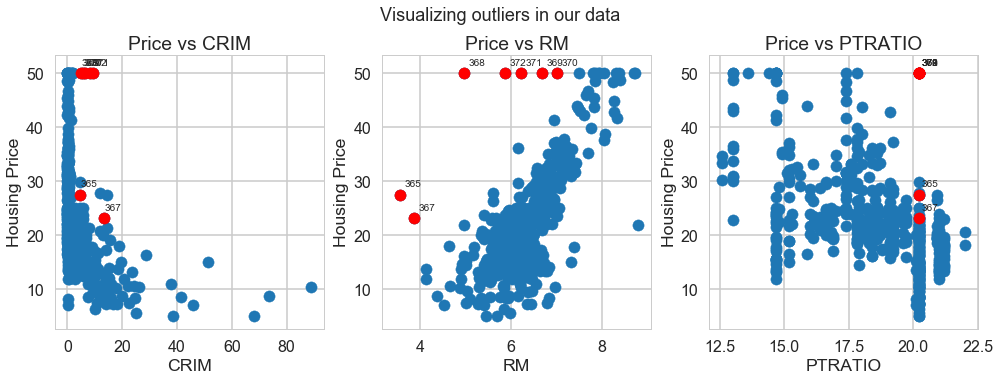

In [58]:
# Visulaizing the scatter plots with outlier points highlighted 
bos_out = bos.loc[outlier_index]
cols = ['CRIM', 'RM', 'PTRATIO']
fig, ax = plt.subplots(1, 3)
for i in range(0, len(cols)):
    ax[i].figure.set_size_inches(14, 5)
    ax[i].scatter(bos[cols[i]], bos.PRICE)
    ax[i].scatter(bos_out[cols[i]], bos_out.PRICE, color='r')
    for j in bos_out.index:
        ax[i].annotate(j, (bos_out.loc[j, cols[i]], bos_out.loc[j, 'PRICE']), \
                       xytext=(bos_out.loc[j, cols[i]] + 0.1, bos_out.loc[j, 'PRICE'] + 1.5))
    ax[i].set_xlabel(cols[i])
    ax[i].set_ylabel("Housing Price")
    ax[i].set_title('Price vs '+cols[i])
    fig.tight_layout()
_ = plt.suptitle('Visualizing outliers in our data', x= 0.5, y= 1.05, fontsize = 18)
_ = plt.tight_layout()

__Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.__ 

***
* The influence of an observation $X_i$ is defined by how much the least squares regression fitted line changes if that particular point was removed from our model. An $outlier$ is a point which is extreme in $Y$ direction and a point with high $leverage$ is extreme in $X$ direction. Some combination of an extreme $Y$ ($outlier$) and an extreme $X$ ($leverage$) makes a data point $influential$. So, not all outliers and not all points with high leverages have high influence. 
* Influence can be calcualted using the Cook's distance which is simply a measure of how much the prediction changes for a particular observation if that observation is removed. 
* We can plot the leverage vs Normalized Residuals*2 plot by using `plot_leverage_resid2` from the `statsmodels.graphics.regressionplots` library to check which points have high residuals and leverages.
* We can also plot the studentized residuals vs high leverage plot using `influence_plot` from the same library.
* We'll also the plot the cook's distance plot. More about cook's distance:
    * "Cook's distance" is a measure of the influence of each observation on the regression coefficients. The Cook's distance statistic is a measure, for each observation in turn, of the extent of change in model estimates when that particular observation is omitted. Any observation for which the Cook's distance is close to 1 or more, or that is substantially larger than other Cook's distances (highly influential data points), requires investigation.
***

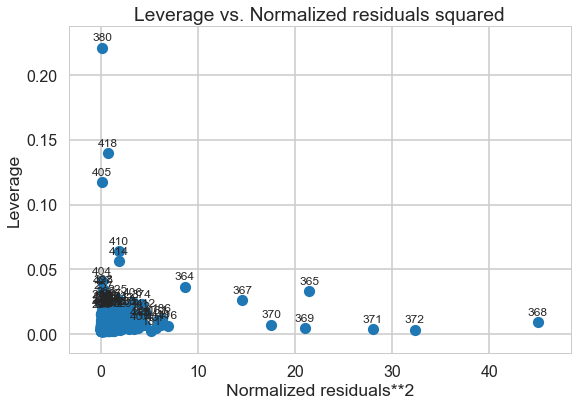

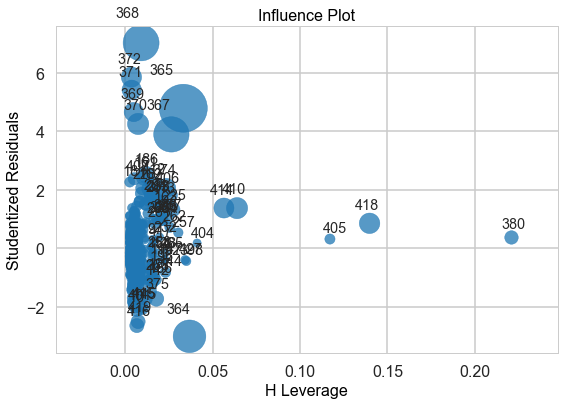

In [59]:
 from statsmodels.graphics.regressionplots import *

fig, ax1 = plt.subplots(figsize=(9,6))
fig = plot_leverage_resid2(m_CR_RM_PT, alpha=0.05, ax = ax1)

fig, ax2 = plt.subplots(figsize=(9,6))
fig = influence_plot(m_CR_RM_PT, ax = ax2)

***
* From the above two plots we can see that there are some observations with high leverage and other observations with high residuals. It will really depend on the threshold for influence we will use to determine which points out of the above are highly influential.


***
Calculating below the points with high leverage. By rule of thumb leverage is assumed to be significant if it is greater than $3*p/n$ where p = number of variables including the intercept which is 4 in our case and n = number of observations.


In [60]:
# calculating leverage
influence = m_CR_RM_PT.get_influence()

leverage = pd.Series(influence.hat_matrix_diag)

p = 4 ; n = len(leverage)

# calculating high leverage values
highlev = leverage[leverage > 3*4/n]
# calculating the index for high leverage points in our dataset
highlev.index

Int64Index([225, 257, 262, 267, 364, 365, 367, 380, 398, 404, 405, 406, 410,
            414, 418, 427],
           dtype='int64')

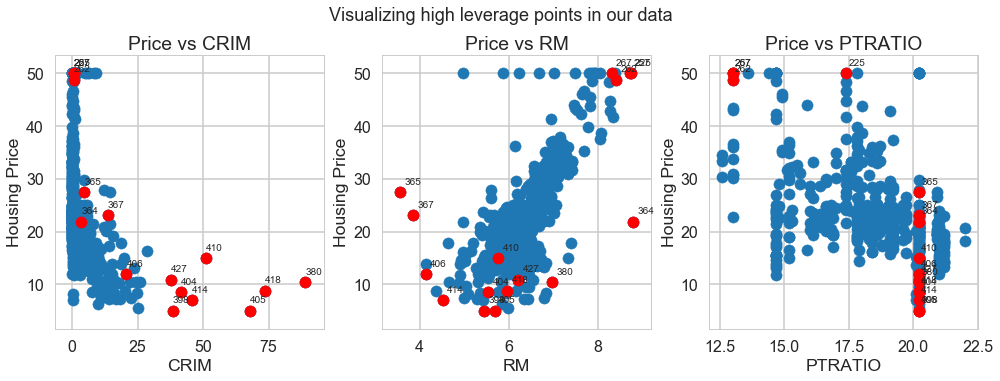

In [61]:
# Visulaizing the scatter plots with high leverge points highlighted 
bos_highlev = bos.loc[highlev.index]
cols = ['CRIM', 'RM', 'PTRATIO']
fig, ax = plt.subplots(1, 3)
for i in range(0, len(cols)):
    ax[i].figure.set_size_inches(14, 5)
    ax[i].scatter(bos[cols[i]], bos.PRICE)
    ax[i].scatter(bos_highlev[cols[i]], bos_highlev.PRICE, color='r')
    for j in bos_highlev.index:
        ax[i].annotate(j, (bos_highlev.loc[j, cols[i]], bos_highlev.loc[j, 'PRICE']), \
                       xytext=(bos_highlev.loc[j, cols[i]] + 0.1, bos_highlev.loc[j, 'PRICE'] + 1.5))
    ax[i].set_xlabel(cols[i])
    ax[i].set_ylabel("Housing Price")
    ax[i].set_title('Price vs '+cols[i])
    fig.tight_layout()
_ = plt.suptitle('Visualizing high leverage points in our data', x= 0.5, y= 1.05, fontsize = 18)
_ = plt.tight_layout()

***
* We can get some insight into the leverage points by looking at the above plots:
    * Price vs CRIM: The high leverage points seem to be the one with high CRIM values. As discussed earlier 75% of the observation points have CRIM values lower than ~3 and we can clearly see that the above points are way above 3 and so are extreme in X direction. The high leverage points at top left corner seems to be from the RM variable as seen from the RM plot.
    * Price vs RM: The points at indices 225, 257, 262, 267, 364, 365 and 367 seems to be away from the RM-mean values and the housing values don't typically follow the positive linear trend for these observations. The other high leverage points in this plot seems to be from the CRIM variable.
    * Price vs PTRATIO: All the high leverage points in this plot seem to be explained by the extreme values of CRIM and RM variables as seen above. 
***

***
* Checking the high influence points using Cook's distance.
    * A general assumption is that a cook's distance > 4/n is noteworthy, where n = number of observations for very high number of observations (ref: http://www.lithoguru.com/scientist/statistics/Lecture22.pdf).
    * But if the sample data is small anything above 0.5 is considered significant and above 1 is said to be highly influential and should be looked into.


 Int64Index([145, 161, 162, 163, 166, 186, 195, 203, 204, 225, 228, 233, 283,
            364, 365, 366, 367, 368, 369, 370, 371, 372, 374, 375, 380, 406,
            410, 412, 413, 414, 415, 416, 418, 419, 453],
           dtype='int64')


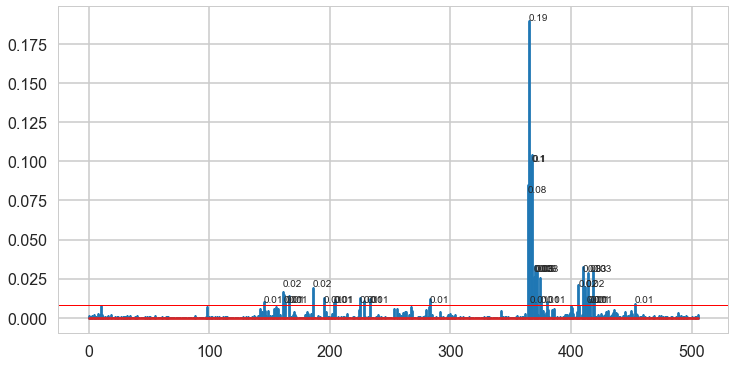

In [62]:
# Plotting the Cook's distance plot


#c is the distance and p is p-value
(c, p) = influence.cooks_distance
inf_points = pd.Series(c)
inf_points = inf_points[c > 4/len(c)]
_ = plt.figure(figsize = (12,6))
_ = plt.stem(np.arange(len(c)), pd.Series(c), markerfmt = ",")
_ = plt.axhline(y = 4/len(c), linewidth = 1, c = 'r')
for i in inf_points.index:
    plt.annotate(np.round(inf_points.loc[i], 2), (i, np.round(inf_points.loc[i], 2)))
print('\n', inf_points.index)

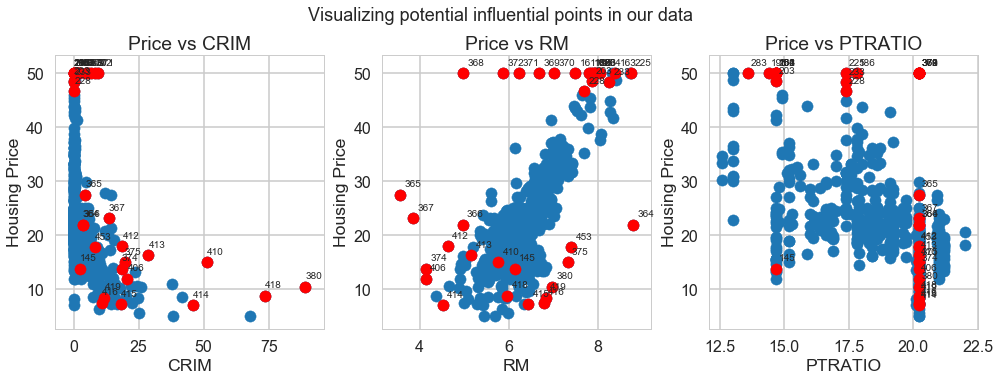

In [63]:
# Visulaizing the scatter plots with high influence points highlighted 
bos_highinf = bos.loc[inf_points.index]
cols = ['CRIM', 'RM', 'PTRATIO']
fig, ax = plt.subplots(1, 3)
for i in range(0, len(cols)):
    ax[i].figure.set_size_inches(14, 5)
    ax[i].scatter(bos[cols[i]], bos.PRICE)
    ax[i].scatter(bos_highinf[cols[i]], bos_highinf.PRICE, color='r')
    for j in bos_highinf.index:
        ax[i].annotate(j, (bos_highinf.loc[j, cols[i]], bos_highinf.loc[j, 'PRICE']), \
                       xytext=(bos_highinf.loc[j, cols[i]] + 0.1, bos_highinf.loc[j, 'PRICE'] + 1.5))
    ax[i].set_xlabel(cols[i])
    ax[i].set_ylabel("Housing Price")
    ax[i].set_title('Price vs '+cols[i])
    fig.tight_layout()
_ = plt.suptitle('Visualizing potential influential points in our data', x= 0.5, y= 1.05, fontsize = 18)
_ = plt.tight_layout()

***
* We can see that most of the influential points are either outliers or the high leverage points in our data. The classification as high influence points depends on the threshold we set for the influence. Here we used a very rough estimate of the threshold as 4/n which might not be that accurate. So, it's good to compare both the models with and without these high influence points and then decide whether these points should be dropped or not.
***

In [64]:
# Creating indeices for the influence points
infl = set(inf_points.index) #set(outlier_index) & set(bos_highlev.index) & 
#bos.loc[infl]

* If we closely observe the indices of the high leverage, outliers and high influence points we observe that the high influence points are a perfect set of the high leverage and outlier points.

__Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?__

In [65]:
# Filtering our bos data to remove the influential points
mask = bos.loc[infl].index
bos_cleaned = bos.drop(mask, axis = 0)
print('number of data points in the cleaned data set: {}'.format(len(bos_cleaned)))

number of data points in the cleaned data set: 471


In [66]:
# Fitting our model again to the bos_cleaned data (bos without high influence points)
clean_m_CR_RM_PT = ols('PRICE ~ CRIM + RM + PTRATIO', bos_cleaned).fit()
print(clean_m_CR_RM_PT.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     451.0
Date:                Sat, 20 Jul 2019   Prob (F-statistic):          1.72e-137
Time:                        00:39:33   Log-Likelihood:                -1312.4
No. Observations:                 471   AIC:                             2633.
Df Residuals:                     467   BIC:                             2650.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0285      2.997     -3.680      0.0

***
__---------------------------------------------------------------------------------------------------------------------__
* We can see that the $R^2$ has improved from 0.593 to 0.743 for the same model by removing the high influence points.
* Even the F-stat has improved from 244.2 to 451.0 but we need to take into account that we have considerably decreased the number of observations from 506 to 471 which highly infuences a F-stat. A good way of comparison will be to calculate the F-compared.
* The p-values for t-stat are zero for all variables including the intercept and the AIC value is lower than that of the previous model. So we can say that the intercepts and slopes are significant and the model has improved by removing the high influence points. 
***
